In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\u1171749\Downloads\heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [93]:
'''Download heart disease dataset heart.csv in Exercise folder and do following, (credits of dataset:  https://www.kaggle.com/fedesoriano/heart-failure-prediction)

1. Load heart disease dataset in pandas dataframe
1. Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3
1. Convert text columns to numbers using label encoding and one hot encoding
1. Apply scaling
1. Build a classification model using various methods (SVM, logistic regression, random forest) and check which model gives you the best accuracy
1. Now use PCA to reduce dimensions, retrain your model and see what impact it has on your model in terms of accuracy. Keep in mind that many times doing PCA reduces the accuracy but computation is much lighter and that's the trade off you need to consider while building models in real life

'''

"Download heart disease dataset heart.csv in Exercise folder and do following, (credits of dataset:  https://www.kaggle.com/fedesoriano/heart-failure-prediction)\n\n1. Load heart disease dataset in pandas dataframe\n1. Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3\n1. Convert text columns to numbers using label encoding and one hot encoding\n1. Apply scaling\n1. Build a classification model using various methods (SVM, logistic regression, random forest) and check which model gives you the best accuracy\n1. Now use PCA to reduce dimensions, retrain your model and see what impact it has on your model in terms of accuracy. Keep in mind that many times doing PCA reduces the accuracy but computation is much lighter and that's the trade off you need to consider while building models in real life\n\n"

In [2]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
df.shape

(918, 12)

In [9]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<Axes: xlabel='Cholesterol'>

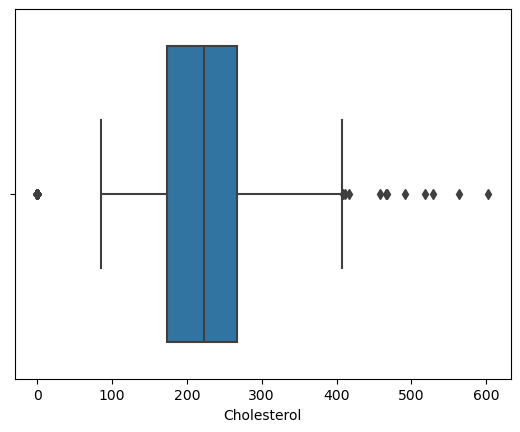

In [14]:
sns.boxplot(x=df["Cholesterol"])

<Axes: xlabel='FastingBS'>

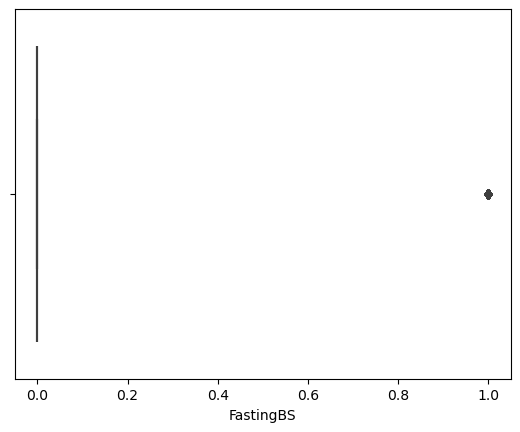

In [16]:
sns.boxplot(x=df["FastingBS"])

<Axes: xlabel='MaxHR'>

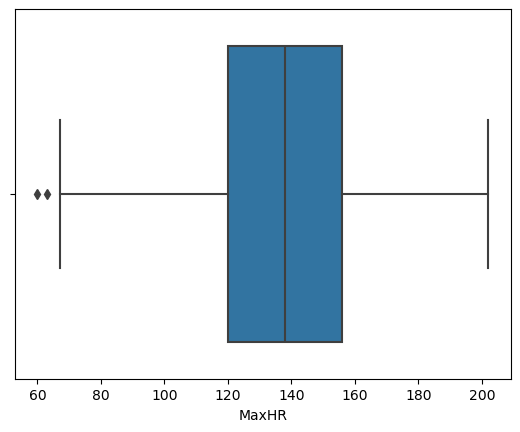

In [17]:
sns.boxplot(x=df["MaxHR"])

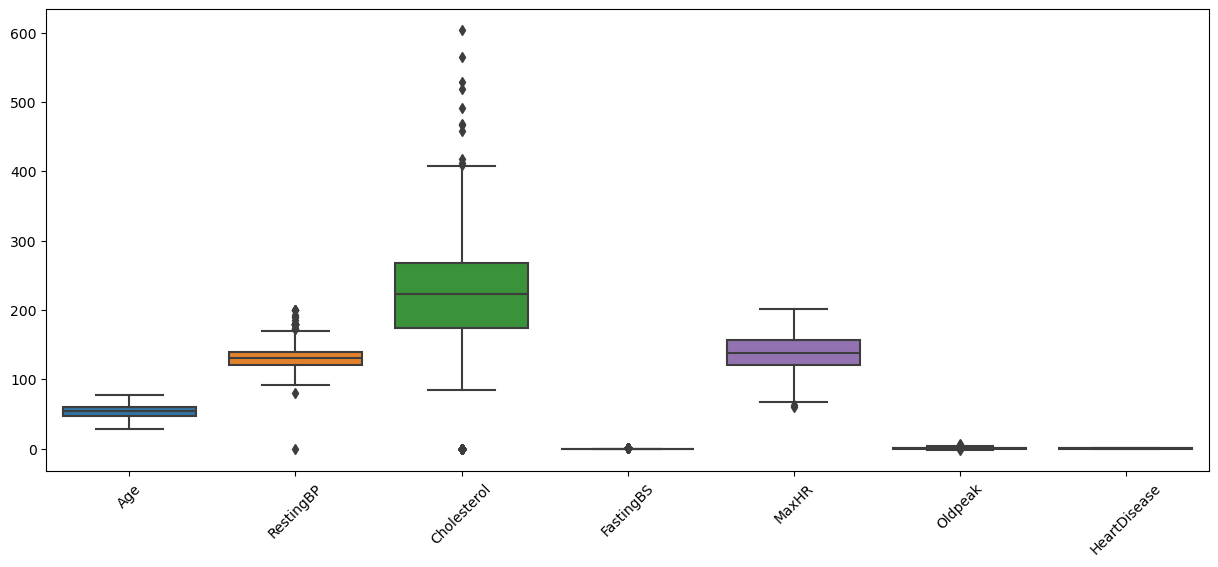

In [24]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Oldpeak'>

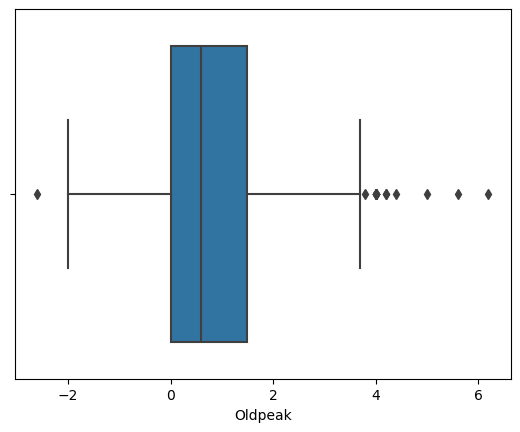

In [25]:
sns.boxplot(x=df["Oldpeak"])

In [31]:
df.shape

(918, 12)

In [ ]:
#we have all 5 numeric features. Among them we have found, Resting BP, Cholosterol,old peak are having outliers from the boxplot.

In [28]:
#removing outliers
df[df["Cholesterol"]> df["Cholesterol"].mean() + 3*df["Cholesterol"].std()]


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0


In [29]:
#removing 3 entities
df1 = df[df["Cholesterol"] <= df["Cholesterol"].mean() + 3*df["Cholesterol"].std()]

In [30]:
df1.shape

(915, 12)

In [32]:
df[df["RestingBP"]> df["RestingBP"].mean() + 3*df["RestingBP"].std()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
399,61,M,NAP,200,0,1,ST,70,N,0.0,Flat,1
592,61,M,ASY,190,287,1,LVH,150,Y,2.0,Down,1
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1


In [35]:
df2 = df1[df1["RestingBP"]<= df1["RestingBP"].mean() + 3*df1["RestingBP"].std()]

In [36]:
df2.shape

(908, 12)

In [37]:
df[df["Oldpeak"]> df["Oldpeak"].mean() + 3*df["Oldpeak"].std()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
166,50,M,ASY,140,231,0,ST,140,Y,5.0,Flat,1
702,59,M,TA,178,270,0,LVH,145,N,4.2,Down,0
771,55,M,ASY,140,217,0,Normal,111,Y,5.6,Down,1
791,51,M,ASY,140,298,0,Normal,122,Y,4.2,Flat,1
850,62,F,ASY,160,164,0,LVH,145,N,6.2,Down,1
900,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1


In [42]:
df3 = df2[df2["Oldpeak"] <= df2["Oldpeak"].mean() + 3*df2["Oldpeak"].std()]

In [43]:
df3.shape

(902, 12)

In [44]:
df.FastingBS.unique()

array([0, 1], dtype=int64)

In [46]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [47]:
df.Sex.unique()

array(['M', 'F'], dtype=object)

In [48]:
df.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [49]:
df.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [50]:
df.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

In [52]:
df.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [ ]:
#now we have ensured all our 12 attributes are without outliers.

In [ ]:
#now use label encoding and one hot encoding 

In [60]:
#create a copy of df3 to avoid editing the original df3
df4 = df3.copy()
df4.ExerciseAngina.replace( {
    'N':0,
    'Y':1
}, inplace = True)

df4.RestingECG.replace({
    'Normal':1,
    'ST':2,
    'Y':3}, inplace=True)

df4.ST_Slope.replace({
    'Down' : 1,
    'Flat' : 2,
    'Up' : 3}, inplace=True
    )


In [61]:
df4.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,1,172,0,0.0,3,0
1,49,F,NAP,160,180,0,1,156,0,1.0,2,1
2,37,M,ATA,130,283,0,2,98,0,0.0,3,0
3,48,F,ASY,138,214,0,1,108,1,1.5,2,1
4,54,M,NAP,150,195,0,1,122,0,0.0,3,0


In [72]:
#get_dummies method in pandas , convert categorical data into numerical 
#drop first method help to ab=void multicolinearity
df5 = pd.get_dummies(df4, drop_first=True)
df5.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_2,RestingECG_LVH
0,40,140,289,0,172,0,0.0,3,0,True,True,False,False,False,False
1,49,160,180,0,156,0,1.0,2,1,False,False,True,False,False,False
2,37,130,283,0,98,0,0.0,3,0,True,True,False,False,True,False
3,48,138,214,0,108,1,1.5,2,1,False,False,False,False,False,False
4,54,150,195,0,122,0,0.0,3,0,True,False,True,False,False,False


In [63]:
#here we dont need the target column -> heart disease,
#Therefore we will drop that first
X = df5.drop("HeartDisease",axis='columns')
y = df5.HeartDisease

In [65]:
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_2,RestingECG_LVH
0,40,140,289,0,172,0,0.0,3,True,True,False,False,False,False
1,49,160,180,0,156,0,1.0,2,False,False,True,False,False,False
2,37,130,283,0,98,0,0.0,3,True,True,False,False,True,False
3,48,138,214,0,108,1,1.5,2,False,False,False,False,False,False
4,54,150,195,0,122,0,0.0,3,True,False,True,False,False,False


In [66]:
X.shape

(902, 14)

In [68]:
#now we have the target variable and the input variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)


In [71]:
x_scaled

array([[-1.42896269,  0.46089071,  0.85238015, ..., -0.22914788,
        -0.49062742, -0.5027701 ],
       [-0.47545956,  1.5925728 , -0.16132855, ..., -0.22914788,
        -0.49062742, -0.5027701 ],
       [-1.74679706, -0.10495034,  0.79657967, ..., -0.22914788,
         2.03820649, -0.5027701 ],
       ...,
       [ 0.37209878, -0.10495034, -0.61703246, ..., -0.22914788,
        -0.49062742, -0.5027701 ],
       [ 0.37209878, -0.10495034,  0.35947592, ..., -0.22914788,
        -0.49062742,  1.98898063],
       [-1.64085227,  0.3477225 , -0.20782894, ..., -0.22914788,
        -0.49062742, -0.5027701 ]])

In [74]:
#selecting a model and train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_scaled , y, test_size=0.2,random_state=30)

In [75]:
X_train.shape

(721, 14)

In [76]:
X_test.shape

(181, 14)

In [78]:
from sklearn.linear_model import LogisticRegression

model_1 = LogisticRegression()
model_1.fit(X_train, y_train)
model_1.score(X_test, y_test)

0.8453038674033149

In [79]:
from sklearn.linear_model import LinearRegression

model_2 = LinearRegression()
model_2.fit(X_train, y_train)
model_2.score(X_test, y_test)

0.5144568596790724

In [80]:
from sklearn.ensemble import RandomForestClassifier

model_3 = RandomForestClassifier()
model_3.fit(X_train,y_train)
model_3.score(X_test,y_test)

0.856353591160221

In [82]:
#now we have done the data preprocessing, and the model selections
#now we can go to dimensionality reduction
#perform PCA

from sklearn.decomposition import PCA
#Here we want to cover 95% of the variance from total variance from our new PCA'S
pca = PCA(0.95)
x_pca = pca.fit_transform(X)

In [84]:
x_pca

array([[ 93.82511068, -29.4006913 ],
       [-15.5837713 , -14.10904403],
       [ 83.29521503,  38.68866293],
       ...,
       [-67.57273648,  17.61298054],
       [ 40.70404668, -33.38906386],
       [-19.91322666, -37.29076877]])

In [89]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(x_pca,y,test_size=0.2,random_state=30)

In [92]:
from sklearn.ensemble import RandomForestClassifier

model_4 = RandomForestClassifier()
model_4.fit(X_train_pca,y_train)
model_4.score(X_test_pca,y_test)

0.7292817679558011

In [ ]:
#before performing the PCA, RANDOMFORESTCLASSIFIERS ACCURACY WAS 0.8563,
#BUT AFTER DOING THE PCA, THIS MODEL'S ACCURACY HAS DROPPED TO 0.7293
#BUT WE ARE DOING THE PCA because to the efficiency and performance imporvements.